In [239]:
# Import required packages
import numpy as np               # for mathematical operations, for arrays
import pandas as pd              # Used for different data manipulation tasks
import matplotlib.pyplot as plt  # Used for Plotting 
import random                    # For random number generator
import warnings
warnings.filterwarnings('ignore')# To avoid warnings note while running the notebook

# Section 1 : Implementing Gradient Descent

Gradient Descent is an first order optimization algorithm to find the local minimum differentiable function (usually a loss function or an objective function). We start with a random point on the function and move in the negative direction of the gradient of the function to reach the find minimum.

Let $F(x)$ be a differentiable function parameterised by $x$ and $x^*$ be the parameter value which minimises $F(x)$. The initial value is $x_0=a_0$. To determine $x^*$ using gradient descent, at each of the $i^{th}$ the parameter updation rule is:

\begin{align*}
x_i = x_{i-1} - \eta \nabla F(a_{i-1}), \hspace{1cm} i\geq 1
\end{align*}  
where $x_i$ is updated value of the parameter in the $i^{th}$ iteration. 

\begin{align*}
\eta \nabla F(a_{i-1}) = \eta \frac{dF}{dx}\bigr \rvert_{x=a_{i-1}}
\end{align*} 

**Stopping Criteria**: Following are three ways which are used as stopping criteria in gradient descent algorithm:
1. Limiting number of iterations
2. Threshold for change in the parameter (i.e difference between the updated parameter and parameter in the previous iteration) --> Change in parameter > Threshold
3. Threshold for change in gradient step
                  
**Question** : Find $x^*$ which minimises $F(x) = (x+5)^2$ using gradient descent 

**Note : Few variables are set to a given value, read the instructions in the pseudo code**

**Pseudo Code**:
1. Initialise the parameter ('x') with some random number,set learning rate = 0.01(section 4 has details on "how to select appropriate learning rate for a given problem"), set threshold = 0.000001,
2. Define a function for calculating differential of F (Hint : Use lambda method for single line of code)
3. Compute the updated value of the parameter using the formula: $x_i = x_i-1 - \eta \nabla F(a_{i-1})$ 
4. Iterate over step 3 until the stopping criteria is satisfied (You have to choose stopping criteria appropriately)

## 1.1 Implementing Code
Implement the above pseudo code and print the optimum value of $x$ and $F(x)$. Also print the number of iterations required to reach that optimum.

**Note : Carefully choose your stopping criteria for reaching optimum**

In [240]:
# Write your code here
#Generating random starting point
x = np.random.random()

#Initializing learning rate
eta = 10e-6

#F(x) = (x+5)^2; F'(x) = 2x+10 => Lambda function to calculate derivative
diff = lambda x: 2*x+10

#Tolerance level: 10^-9
tol = 10e-9

xk = np.inf

#Maximum Number of iterations: 10^6
max_iter = 10e6

ite = 0

#while change in x is greater than tolerance and number of iterations <= maximum limit
while abs(xk-x) > tol and ite <= max_iter:
    if xk==np.inf:
        xk = x
    x = xk
    #Updating x based on gradient descent
    xk = x - eta*diff(x)
    ite+=1

print("Optimum x Value: "+str(xk))
print("F(x) = F(%f) "%xk+" = %f"%(xk+5)**2)

Optimum x Value: -4.999500017454717
F(x) = F(-4.999500)  = 0.000000


# Section 2 : Linear Regression - Finding the Regression parameters using Normal Equation (Analytical Approach)
**Dataset** : dataset1.csv (given)

Given a dataset (here dataset1.csv), find the coefficients (parameters) using the Normal Equation and predict the outputs for the same dataset (dataset1.csv). Given input features in matrix $X$ and observed output or target vector $y$, the regression parameters are given by the equation:
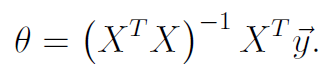


**Pseudo Code:**
1. Append ones to X, let say that as "X_appended" (This is to be done when there is intercept, if you know before hand that intercept is zero, then this step can be ignored)
2. Find the pseudo Inverse of the X_appended
3. Find the dot product of transpose of X_appended and target vector (y),
4. Find "theta" (parameters) using "Normal Equation" given above (i.e Matrix multiplication of outputs of Step 2 and Step 3)
5. Predict ouputs for X_new by appending it with ones and then using the formula $y=X_{new}\theta$

**Note : When you perform matrix multiplications or dot products on vectors or matrices, always keep track of the matrix or vectors shapes. This helps you in avoiding implementation errors.**

<div class="alert alert-block alert-warning">
**Implementation Note:** Step 1 is crucial. We store each example as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>

In [241]:
# Import X, y from "dataset1.csv"
# X and y are numpy array, Hint : store the data in the pandas dataframe and then convert it to numpy array
#Reading Dataset1
dataset1 = pd.read_csv("dataset1.csv")
X = np.array(dataset1["X"]).reshape(-1,1)
y = np.array(dataset1["y"]).reshape(-1,1)
m = X.shape[0]

#Appending columns of ones for bias
X_appended = np.append(np.ones((m,1)),X,axis=1)

#Calculating Pseudoinverse of X
pseudo_inv = np.dot(np.linalg.inv(np.dot(X_appended.T,X_appended)),X_appended.T)
#product of X transpose and y
X_T_y = np.dot(X_appended.T,y)
#Calculating theta using the normal equation
theta = np.dot(pseudo_inv,y)

print("theta = "+str(theta))
print(u'\u03F4\u2080 = %f'%theta[0])
print(u'\u03F4\u2081 = %f'%theta[1])

theta = [[17.78924731]
 [ 4.90189099]]
ϴ₀ = 17.789247
ϴ₁ = 4.901891


### 2.1 Function to predict the outputs
Implement the predict function below. Predict the outputs for the given data (dataset1.csv), plot the predicted outputs Vs input features and scatter plot for dataset1.csv (X,y)

Text(0.5, 1.0, 'dataset1.csv')

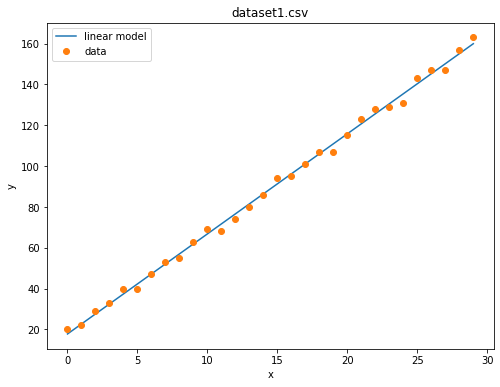

In [242]:
def predict(X, theta):
    """
    Predictions of X for a given theta.
    
    Parameters
    ----------
    X : array with size of (m x n)
    
    theta : array with size of (n+1, 1).
    
    Returns
    -------
    predictions : array of size (m x 1)
    
    """
    m = X.shape[0]
    prediction = np.dot(np.append(np.ones((m,1)),X,axis=1),theta)

    return prediction

# Your predictions for the dataset1.csv
y_pred = predict(X,theta)

# plot a line Predictions Vs features and scatter plot for the training data X,y
plt.figure(figsize=(8,6))
plt.plot(np.linspace(0,max(X),2),predict(np.linspace(0,max(X),2),theta))
plt.plot(X,y,"o")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["linear model","data"])
plt.title("dataset1.csv")

# Section 3 : Linear Regression - Find the Regression parameters using Gradient Descent
This section is about applying gradient descent algorithm to find theta at which a cost function (Mean Squared Error) is minimum. This can be done using the gradient descent algorithm discussed in Section 1, where $x$ is replaced by the regression parameters. 

Refer to pseudo code in Section 1 for gradient descent algorithm. In simple terms, we initialise the regression parameters with some random number and we compute the gradient step to update the regression parameters.

### 3.1. Import and visualise the dataset

Text(0.5, 1.0, 'dataset1.csv')

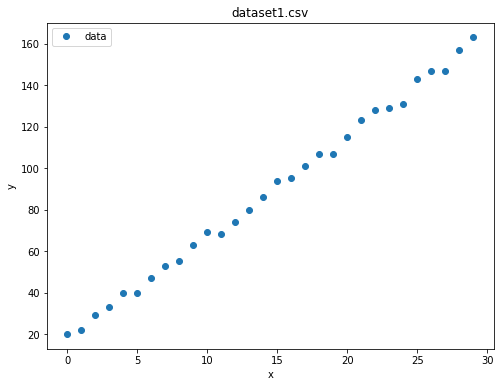

In [243]:
# Import the data from dataset1.csv - Same as Section 2
# Import X and y as numpy array, Hint : store the data in the pandas dataframe and then convert it to numpy array
dataset1 = pd.read_csv("dataset1.csv")
X = np.array(dataset1["X"]).reshape(-1,1)
y = np.array(dataset1["y"]).reshape(-1,1)
m = len(X)
X_appended = np.append(np.ones((m,1)),X,axis=1)

# Scatter Plot the data X and y for visualisation
plt.figure(figsize=(8,6))
plt.plot(X,y,"o")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["data"])
plt.title("dataset1.csv")

### 3.2. Compute Cost Function - Mean Squared Error (MSE) 
The cost function used is Mean Squared Error (MSE) represented as $J(\theta)$ and is given by:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is a linear model given by: 
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. This way you can know whether you choose high learning rate or low learning rate. Suppose if your learning rate is too high, you can see your cost will go up and down, but will not converge. If you choose good learning rate, then you can see your cost going down smoothly and converges.

In this you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

In [244]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array with the shape of (m x n+1)
        where m is the number of examples,n is the number of features
        n+1 == n features + 1 for bias term(intercept as a feature)
    
    y : array with the shape of (m,1)
    
    theta : array with the shape of (n+1,1)
    
    Returns
    -------
    J : float -> The value of the regression cost function.
    
    """
    # Write your code here
    m = X.shape[0]
    J = np.sum((np.dot(X,theta)-y)**2)/(2*m)
    
    return J

## 3.3. Implementation of Gradient Descent 

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).


**Important implementation notes**

The function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a python list. If you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [245]:
def gradientDescent(X_appended, y, theta, alpha, precision = 0.001):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X_appended : array with shape of (m x n+1). Note : n+1 = n features + 1 intercept
    
    y : array with shape of (m, 1)
    
    theta : array with shape of (n+1,1)
    
    alpha : float value, called as "learning rate"
    
    precision : float, (One of the Stopping criteria). This is compared with the change in the cost from previous iter.
    
    Returns
    -------
    theta : array wih shape of (n+1,1),The learned linear regression parameters
    
    J_history : A python list for the values of the cost function after every iteration. This is to check for convergence
    
    Count : Integer, Number of iterations taken to converge
    
    Cost : Float, Mean squared error at the end of the iteration
    
    
    Hint: 
    ------------
    1. Peform a single gradient step on the parameter vector theta.
    2. Loop over the number of iterations to update step by step.
    """
    # Write your code here
    J_history = [np.inf]
    count = 0
    cost = 0
    m = X_appended.shape[0]
    
    #Derivative of cost function
    diff_cost = lambda y_cap,y,x,m: ((1/m)*np.dot((y_cap - y).T,x)).T
    
    while abs(J_history[-1]-cost)>precision:
        if J_history[0]==np.inf:
            del J_history[0]
        J_history.append(cost)
        y_pred = np.dot(X_appended,theta)
        #Calculating Cost function
        cost = computeCost(X_appended, y, theta)
        #Updating Parameters
        theta -= alpha*diff_cost(y_pred,y,X_appended,m)
        #Number of iterations
        count += 1
    
    del J_history[0]
    
    return theta, J_history, cost, count

### Run gradientDescent function to train the model here
**Note : Use the learning rate(alpha) and precision given below. Initialise theta with zeros is suggested here (but you can initialise with different numbers)**

Print the final theta (learnt parameters), number of iterations to converge, value of cost function at the convergence.

In [246]:
# initialize fitting parameters with zeros
theta = np.zeros((2,1))

# Play with these setting to see how these parameters play a huge, for a decent converge use below parameters
precision = 0.000001
alpha = 0.001

##################################### Your Code here ########################################
theta, J_history, cost, count = gradientDescent(X_appended, y, theta, alpha, precision)

In [247]:
print("theta = "+str(theta))
print(u'\u03F4\u2080 = %f'%theta[0])
print(u'\u03F4\u2081 = %f'%theta[1])
print("Number of iterations = %d"%count)
print("Value of Cost function = %f"%cost)

theta = [[17.66877817]
 [ 4.90802217]]
ϴ₀ = 17.668778
ϴ₁ = 4.908022
Number of iterations = 18996
Value of Cost function = 2.424135


## 3.4. Plot the Training Curve
**Tip:** Initially the change in the loss(J) are drastic and dominating. So while plotting you may remove the first 10% of the iterations and then plot to see a smooth curve in the training process

Text(0.5, 1.0, 'Training Curve')

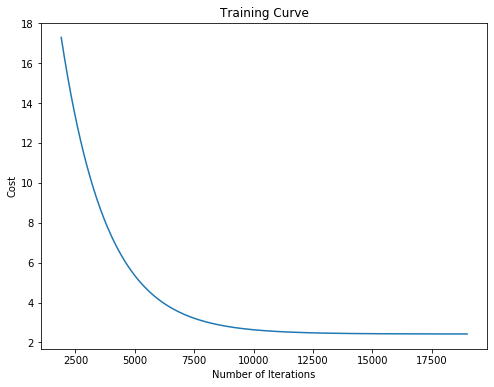

In [248]:
plt.figure(figsize=(8,6))
l = len(J_history)
cost_vals = J_history[int(0.1*l):]
plt.plot([i for i in range(int(0.1*l)+1,l+1)],cost_vals,"-",markersize=3)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Training Curve")

As observed, the cost function decreases with increase in number of iterations and eventually flattens

## 3.5. Predict Outputs and Plot the results
Same as Step 5 in the Section 2. You can use the same function predict(X, theta)

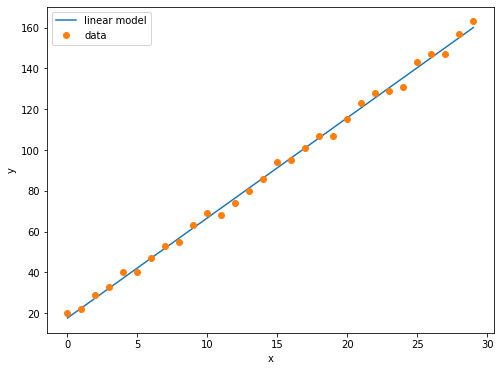

In [249]:
# plot a line for predictions and scatter plot for the training data X,y
plt.figure(figsize=(8,6))
plt.plot(X,np.dot(X_appended,theta),"-")
plt.plot(X,y,"o")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["linear model","data"])

# Section 4 : Selecting appropriate learning rate
**Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge and ‘blow up’, resulting in values which are too large for computer calculations. In these situations, `numpy` will tend to return
NaNs. NaN stands for ‘not a number’ and is often caused by undefined operations that involve −∞ and +∞. So dont worry even if you cost as inf or NaN

**Repeat the training as in Section 3 with different values of alpha as listed below. Print the alpha, cost and number of iterations it took for every alpha**

In [250]:
theta = np.zeros((2,1))
precision = 0.000001

# You can change this set of alphas and try out different, but keep your range less than 1
alphas = [0.0001, 0.0003, 0.0005, 0.0007, 0.001, 0.003, 0.005, 0.007, 0.01,0.03, 0.05, 0.07, 0.1, 0.3]

# Write your code here
for alpha in alphas:
    theta = np.zeros((2,1))
    theta, J_history, cost, count = gradientDescent(X_appended, y, theta, alpha, precision)
    print(">> For alpha = "+str(alpha)+": ")
    print("-> Cost: "+str(cost))
    print("-> Number of Iterations: "+str(count),end="\n\n")

>> For alpha = 0.0001: 
-> Cost: 2.4413078221495095
-> Number of Iterations: 146030

>> For alpha = 0.0003: 
-> Cost: 2.4285868952040355
-> Number of Iterations: 55664

>> For alpha = 0.0005: 
-> Cost: 2.4260422656254055
-> Number of Iterations: 35348

>> For alpha = 0.0007: 
-> Cost: 2.424951548553128
-> Number of Iterations: 26166

>> For alpha = 0.001: 
-> Cost: 2.424134514167511
-> Number of Iterations: 18996

>> For alpha = 0.003: 
-> Cost: 2.4228624540119243
-> Number of Iterations: 7030

>> For alpha = 0.005: 
-> Cost: 2.4226074531485455
-> Number of Iterations: 4413

>> For alpha = 0.007: 
-> Cost: inf
-> Number of Iterations: 261808

>> For alpha = 0.01: 
-> Cost: inf
-> Number of Iterations: 565

>> For alpha = 0.03: 
-> Cost: inf
-> Number of Iterations: 175

>> For alpha = 0.05: 
-> Cost: inf
-> Number of Iterations: 137

>> For alpha = 0.07: 
-> Cost: inf
-> Number of Iterations: 121

>> For alpha = 0.1: 
-> Cost: inf
-> Number of Iterations: 108

>> For alpha = 0.3: 
-> C

## Section 5: Questions on Analytical and Gradient Descent approaches

1. Are the results from both the analytical and gradient descent approach are same? If not, why?
2. When do u prefer analytical approach and gradient descent approach? Hint: Explain interms of size of the dataset
3. Can we use different cost function in place of MSE? If we do, where will be changes in the gradient descent step?(Just mention using words, equations are not required)
4. How does the initialisation of the parameters $\theta$ effects the convergence? In this case we initialised $\theta$ to zeros. What happens if we choose closer to solution and farther to solution?
5. Any drawbacks of Gradient descent that you could think of? Hint : Interms of Convergence rate.
6. What if number of features increases and how does it effect the gradient descent approach and analytical approach? Note:This might require some time to look for appropriate concepts. But do note that this difference is very important to understand.
7. Comment your observations on selecting appropriate learning rate.

**Write your answers in the following Markdown**

#### Q1.
The results (parameter estimates) from the analytical and gradient descent approach are not exactly the same, although they are close enough. While the analytical method tries to find the exact minima of least squares using the normal equation, gradient descent is an iterative optimization algorithm that attempts to minimize the cost function by taking steps proportional to the negative of the gradient of the cost funtion, and the parameters are updated in this manner. The final result obtained through gradient descent approach depends on factors like **parameter initializations, learning rate and number of iterations**. Hence, there is no guarrantee that gradient descent converges to the exact minima, but usually converges close to it (depending on the hyperparameters). Due to these reasons, the estimates obtained from both approaches may not be the same.

#### Q2.
Although the analytical approach gives the most accurate solution, it involves computing the inverse of $A^TA$, which poses huge computational problems as the size of the matrix becomes larger, due to plenty of mathematical operations. In such scenarios, gradient descent approach should be preferred. On the other hand, when the number of training examples is small enough, analytical approaches can be preferred.

#### Q3.
Apart from Mean Square Error (MSE), which is a quadratic loss function, other loss functions that are used include, Mean Absolute Error (MAE), Huber Loss, Log cosh loss and quantile loss. Depending on the loss function we choose, there will be changes in the gradient descent step based on the nature of the derivative of the loss function. In the case of MAE, the gradient steps will be constant (if learning rate is fixed) and independent of $x$. Due to this, the gradient step will be large when we are close to the optimum, which is disadvantageous. On the other hand, MSE behaves better as we move closer to the optimum by taking shorter gradient steps. When very farther from the optimum, MSE takes larger steps than MAE. 

#### Q4.
The initialization of parameters $\theta$ affect the number of steps required for convergence. If we initialize $\theta$ closer to the solution, the rate of convergence will be faster, i.e. it will converge in less number of steps. On the other hand, if $\theta$ is initialized farther from the solution, it will take higher number of steps to converge.

#### Q5.

The disadvantages of Gradient Descent approach include:
- Local Optima: When the cost function if non-convex in nature, gradien descent often converges to a local optimum which may not always be the best solution (as opposed to global optima)
- When the learning rate is high, gradient descent algorithm diverges rather than converging
- When the learning rate is very small, the algorithm would not have reached the optimum even after large number of gradient steps. (Tuning the learning rate can resolve this to some extent)
- The rate of convergence is highly dependent on the parameter initializations and the learning rate, and determine the ideal values for both is difficult
- Large datasets result in slower convergence and high memory usage

#### Q6.
When the number of features increases, higher number of parameters are supposed to estimated. This affects both gradient descent and analytical approaches in terms of computational power. In the case of analytical approach, computing $(A^TA)^{-1}_{n\times n}$ would become more difficult as $n$ is higher. In the case of gradient descent approach, we have to perform higher number of parameter updations and the parameter seach space becomes higher dimensional.

In a special case when the number of features exceed the number of training examples, it becomes and underdetermined solution. Such systems can have infinitely many solutions or no solutions. In this case, we minimise minimise the norm of $x$ and the analytical equation becomes $$\theta = A^T(AA^T)^{-1}y$$

Higher number of features sometime leads to overfitting, where the model does not generalize to unseen data. This can be handled by regularization.

#### Q7.
It is evident that choosing the appropriate learning rate is crucial in the convergence and performance of gradient descent algorithms. A possible strategy would be to try out different values of learning rates and note the one which gives the lowest cost value (and possibly less number of iterations). Following this, we can narrow down the search space further by trying out learning rate values closer to the observed one. 

In this assignment, different learning rates ranging from 0.0001 to 0.3 have been used to train the gradient descent algorithm and the cost value and the number of iterations were noted in each case. It can be noted that all learning rates from 0.0001 to 0.005, resulted in convergence, with 0.005 having the lowest cost of 2.4226 and reasonably less number of iterations (4413). Following these values, all the other learning rates resulted in divergence of the cost function to infinity, even for a closer value of 0.007.

Hence, 0.005 is the best learning rate. If further exploration is required, the search space can be narrowed down to values in the neighborhood of 0.005.